In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [28]:
df = pd.read_csv('CarPrice_Assignment.csv')
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [29]:
print(df.isnull().sum())

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


In [31]:
X = df.drop(['car_ID', 'CarName', 'price'],axis=1)
Y = df['price']

categorical_cols = X.select_dtypes(include=['object']).columns

X_encoded = pd.get_dummies(X,columns=categorical_cols,drop_first=True)

print(X_encoded)

     symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0            3       88.6      168.8      64.1       48.8        2548   
1            3       88.6      168.8      64.1       48.8        2548   
2            1       94.5      171.2      65.5       52.4        2823   
3            2       99.8      176.6      66.2       54.3        2337   
4            2       99.4      176.6      66.4       54.3        2824   
..         ...        ...        ...       ...        ...         ...   
200         -1      109.1      188.8      68.9       55.5        2952   
201         -1      109.1      188.8      68.8       55.5        3049   
202         -1      109.1      188.8      68.9       55.5        3012   
203         -1      109.1      188.8      68.9       55.5        3217   
204         -1      109.1      188.8      68.9       55.5        3062   

     enginesize  boreratio  stroke  compressionratio  ...  \
0           130       3.47    2.68               9.0  ...   
1


--- Training Set Metrics ---
R-squared (R2): 0.9476
Mean Absolute Error (MAE): $1311.95
Mean Squared Error (MSE): $3122539.53
Root Mean Squared Error (RMSE): $1767.07

--- Testing Set Metrics ---
R-squared (R2): 0.8926
Mean Absolute Error (MAE): $2089.38
Mean Squared Error (MSE): $8482008.48
Root Mean Squared Error (RMSE): $2912.39


<Axes: xlabel='price'>

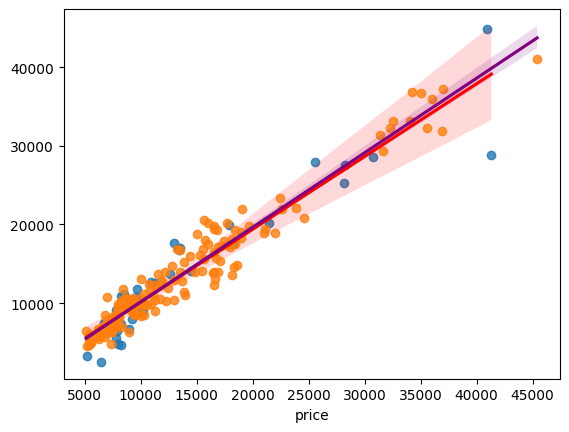

In [50]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

X_train, X_test, Y_train, Y_test = train_test_split(X_encoded,Y,test_size=0.2,random_state=42)
LR = LinearRegression()
LR.fit(X_train,Y_train)

Y_train_pred = LR.predict(X_train)
Y_test_pred = LR.predict(X_test)

def evaluate_model(y_true, y_pred, set_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    print(f"\n--- {set_name} Set Metrics ---")
    print(f"R-squared (R2): {r2:.4f}")
    print(f"Mean Absolute Error (MAE): ${mae:.2f}")
    print(f"Mean Squared Error (MSE): ${mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): ${rmse:.2f}")
    return r2, mae, mse, rmse

r2_train, mae_train, mse_train, rmse_train = evaluate_model(Y_train, Y_train_pred, "Training")
r2_test, mae_test, mse_test, rmse_test = evaluate_model(Y_test, Y_test_pred, "Testing")
    
sns.regplot(x=Y_test, y=Y_test_pred, line_kws={"color": "red"})
sns.regplot(x=Y_train, y=Y_train_pred, line_kws={"color": "purple"})

In [53]:
# POLYNOMIAL LINEAR REGRESSION
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3,include_bias=True)
x_train_trans = poly.fit_transform(X_train)
x_test_trans = poly.transform(X_test)

LR.fit(x_train_trans,Y_train)
print(r2_score(Y_test,LR.predict(x_test_trans)))

-17.076099560299703
